In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats

1. Scale-dependent prior by Klein, Kneib (2016)

In [113]:
shape = 0.5   #shape parameter
scale =0.0028  # nu (scale)
x = np.linspace(0.000001, 0.01, 500)
pdf_scale = stats.weibull_min.pdf(x, c=shape, scale=scale)

2. Inverse gamma a = 1

In [114]:
alpha = 1  # shape parameter
pdf_ig = stats.invgamma.pdf(x, a=alpha, scale=scale)

In [115]:
def pdf_ig_tausq(tau_sq, theta):
    return theta* tau_sq**(-2)*np.exp(-theta/tau_sq)
pdf_ig = pdf_ig_tausq(x, scale)

3. Half-normal for tau -> gamma for tau^2

In [116]:
pdf_half_normal = stats.gamma.pdf(x, a=shape, scale=scale)

4. Half-Cauchy for tau -> generalise beta prime for tau^2

In [117]:
def generalized_beta_prime_pdf(x, a, b, p):
    numerator = p * (x**(a*p - 1)) * ((1 + x**p)**(-(a + b)))
    denominator = scipy.special.beta(a, b)
    return numerator / denominator


a, b, p = 0.5, 0.5, .1
pdf_half_cauchy = generalized_beta_prime_pdf(x, a, b, p)

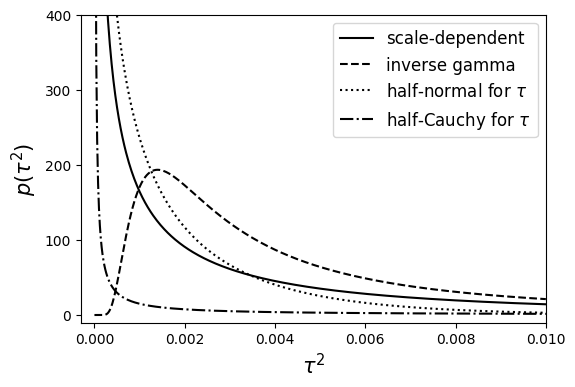

In [118]:
fig, ax = plt.subplots(figsize=(6, 4))
for pdf, label, linestyle in zip([pdf_scale, pdf_ig, pdf_half_normal, pdf_half_cauchy], 
                      ["scale-dependent", "inverse gamma", 
                       r"half-normal for $\tau$", r"half-Cauchy for $\tau$"],
                       ['solid', 'dashed', 'dotted', 'dashdot']):
    ax.plot(x, pdf, label = label, linestyle = linestyle, color = 'black')
ax.set_xlabel(r'$\tau^2$', fontsize=15)
ax.set_ylabel(r"$p(\tau^2)$", fontsize=15)
ax.legend(fontsize = 12)
ax.set_yticks(range(0, 401, 100))
ax.set_ylim(-10,400)
ax.set_xlim(-0.0003,0.010)
fig.savefig('hyperprior_tau.pdf', bbox_inches='tight')
